In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pathlib
from mpl_toolkits.mplot3d import Axes3D
from copy import copy
import matplotlib as mpl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pandas as pd


p = pathlib.PurePath(os.getcwd())
BASE_DIR = str(p.parent)
dataPath = pathlib.Path(BASE_DIR + '/data/population_ratios')
modelPath = pathlib.Path(BASE_DIR + '/data/models')
pop_names = ['JFC', 'HTC', 'AST', 'OCC']

In [2]:
def get_logp_grid(filename = None, dataDir = '/data/population_ratios'):
    path_to_file = BASE_DIR + dataDir + '/' + filename
    print("reading from '"+path_to_file)
    df = pd.read_csv(path_to_file, header = 0, delim_whitespace = True)    
    return df

    
    
def plotMarginalProb(theta_p_list, logp, 
        pop_names = ['JFC', 'HTC', 'AST', 'OCC'], ax = None, 
        multiple = False):

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.axis('equal')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xlabel(pop_names[1])
    ax.set_ylabel(pop_names[2])
    ax.set_zlabel(pop_names[3])
    
    ax.view_init(15, -35)
        
    # Set normalization for colorbar
    cmap = copy(plt.cm.viridis)
    
    norm = mpl.colors.Normalize(vmin = min(logp), 
                                vmax = max(logp))
    norm_levels = mpl.colors.Normalize(vmin = 0, vmax = 1)
    
    cut_cm = plt.cm.plasma
    cuts = np.sort(list(set(theta_p_list[:, 0])))
    for i, cut in enumerate(cuts):
        label = '%s = %1.2f'%(pop_names[0], cut)
        if multiple:
            fig = plt.figure(figsize = (10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.axis('equal')
            ax.view_init(15, -35)
            ax.set_ylim(0, 1)
            ax.set_xlim(0, 1)
            ax.set_zlim(0, 1)
            ax.set_xlabel(pop_names[1])
            ax.set_ylabel(pop_names[2])
            ax.set_zlabel(pop_names[3])
            
        
        if cut != 1:
            x = [1 - cut, 0, 0, 1 - cut]
            y = [0, 1 - cut, 0, 0]
            z = [0, 0, 1 - cut, 0]
            verts = [list(zip(x, y, z))]
            alpha = 0.5
            ax.plot(x, y, z, c = cut_cm(cut), alpha = 0.5)
        
        
        # Plot only plots on that level
        Cs = theta_p_list[theta_p_list[:, 0] == cut]
        log_p_cut = logp[theta_p_list[:, 0] == cut]
        pcm = ax.scatter(Cs[:, 1], Cs[:, 2], Cs[:, 3], 
                     c = log_p_cut, 
                     cmap = cmap, norm = norm,
                     label = None)
        ax.scatter([0], [0], [1 - cut], c = [cut], 
               cmap = cut_cm, norm = norm_levels,
               label = label, alpha = 1)
        
        # Colorbar / legend
        if cut == 0 or multiple:
            fig.colorbar(pcm, ax = ax, extend = 'max')   
        if multiple:
            ax.legend()
    ax.legend()

    return fig

#'grid_smart_logp.txt')#'grid_logp_OLD.txt'
#df = get_logp_grid(filename = 'grid_normed_20181206.txt')

#plotMarginalProb(theta_p_list, logp, pop_names = ['JFC', 'HTC', 'AST', 'OCC']) # 'AST', 'OCC'])


In [3]:
def get_index(pop_type):
    if pop_type == 'JFC':
        return 0
    if pop_type == 'HTC':
        return 1
    if pop_type == 'OCC':
        return 2
    
def plotGrid(df, order = ['JFC', 'HTC', 'OCC']):
    
    fig, ax = plt.subplots(figsize = (10,10))
    print("order0",order[0])
    x = df[order[0]].values.astype(np.float) #theta_p_list[:, get_index(order[0])] # JFC
    print("order1",order[1])
    y = df[order[1]].values.astype(np.float) #theta_p_list[:, get_index(order[1])] # HTC
    print("order2",order[2])
    z = df[order[2]].values.astype(np.float)
    logp = df['logp'].values
    #z = theta_p_list[:, get_index(order[2])]
    cax = ax.scatter(x + y, np.divide(x, x + y), c = logp)
    
    ax.set_xlabel('%s + %s / '%(order[0], order[1]))
    ax.set_ylabel('%s / (%s + %s)'%(order[0], order[0], order[1]))
    
    fig.colorbar(cax)
    #return fig
    

    
def plot3d(df, order = ['JFC', 'HTC', 'Uniform']):
    x = df[order[0]].values 
    y = df[order[1]].values
    z = df[order[2]].values
    logp = df['logp'].values
    
    fig = plt.figure(figsize = (10,10))    
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c = logp)
    ax.view_init(15, -35)
    ax.set_xlabel(order[0])
    ax.set_ylabel(order[1])
    ax.set_zlabel(order[2])


    max_p = np.argmax(logp)

def imshowGrid(df, order, nlev=11, raw_x=False,label=''):
    from scipy import interpolate
    
    mpl.rcParams['font.size'] = 20
    #print(mpl.rcParams)
    fig, ax = plt.subplots(figsize = (10,10))
    
    print("order0",order[0])
    x = df[order[0]].values #theta_p_list[:, get_index(order[0])] # JFC
    #print(x)
    #print('len=',len(x))
    #for i in range(len(x)-1):
    #    print(i,x[i:i+1],end='')
    #    print(x[i:i+1].astype(np.float))
    x=pd.to_numeric(x)
    #print(x)
    #print(x.astype(np.float,errors=""))
    print("order1",order[1])
    y = df[order[1]].values.astype(np.float) #theta_p_list[:, get_index(order[1])] # HTC
    print("order2",order[2])
    z = df[order[2]].values.astype(np.float)
    logp = df['logp'].values
    #print(x)
    #print(y)
    if not raw_x:
        X = x + y
        Y = np.divide(x, x + y)
    else:
        X=x
        Y=np.divide(y,y+z)

    dropNA = [np.logical_not(np.isnan(Y))]
    
    logp = logp[dropNA]
    X = X[dropNA]
    Y = Y[dropNA]
    logpfloor=np.copy(logp)
    logpfloor-=max(logp)
    logpfloor[logpfloor<-nlev*2]=-nlev*2
    #ax.scatter(X, Y, c = logp)
    cax = ax.tricontourf(X, Y, logpfloor, nlev)

    if not raw_x:
        ax.set_xlabel('(%s + %s) / (%s + %s + %s)'%(order[0], order[1], order[0], order[1], order[2]))
        ax.set_ylabel('%s / (%s + %s)'%(order[0], order[0], order[1]))
    else:
        ax.set_xlabel('%s'%(order[0]))
        ax.set_ylabel('%s / (%s + %s)'%(order[1], order[1], order[2]))
    ax.set_title(label)    
    fig.colorbar(cax)

    #return fig
    





reading from '/Users/jgbaker/Projects/LPF/micrometeoriod/LISAPathfinder/scripts/Analysis/data/population_ratios/grid_OCC_JFC_HTC_20190219.txt
order0 JFC
order1 HTC
order2 OCC


/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:83: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecat

        logp  OCC       JFC       HTC
16 -1709.729  0.0  0.842105  0.157895
reading from '/Users/jgbaker/Projects/LPF/micrometeoriod/LISAPathfinder/scripts/Analysis/data/population_ratios/grid_OCC_JFC_HTC_20190327.txt
order0 JFC
order1 HTC
order2 OCC


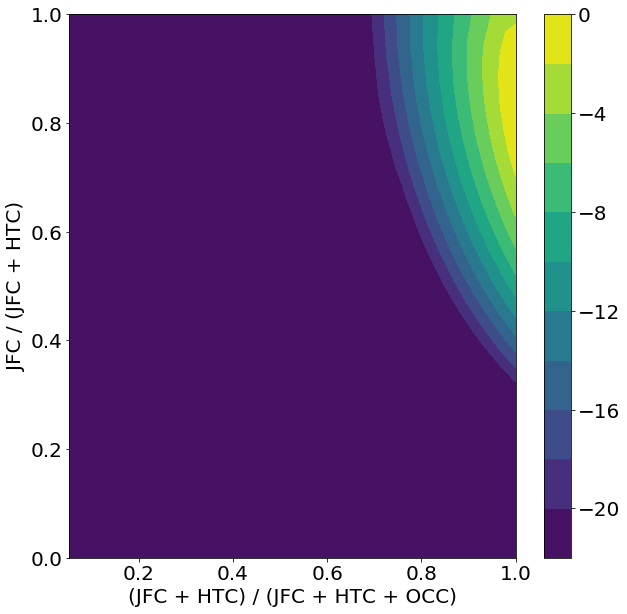

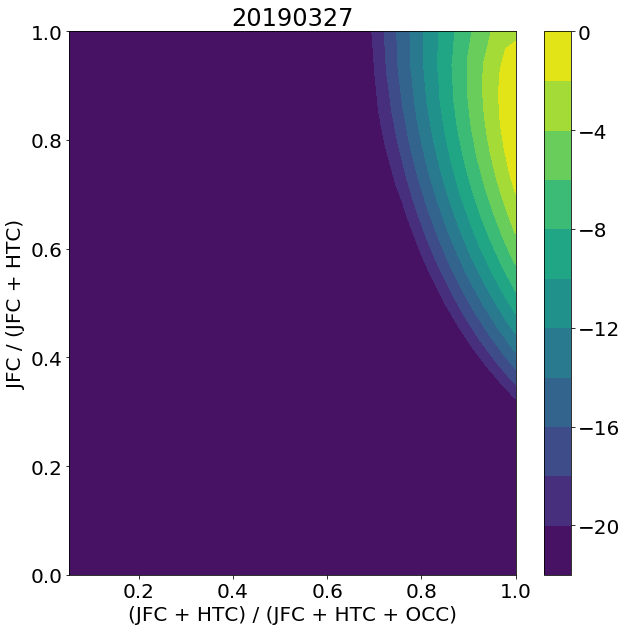

In [4]:

# JFC HTC OCC
"""
df = get_logp_grid(filename = 'only_impacts.txt')#'grid_normed_0802.txt')
order = ['JFC', 'HTC', 'OCC']
imshowGrid(df, order = order)
print('Maximum :', df[df['logp'] == max(df['logp'])])
plot3d(df, order = order)
"""
order = ['JFC', 'HTC', 'OCC']
df = get_logp_grid(filename = 'grid_OCC_JFC_HTC_20190219.txt')
imshowGrid(df, order = order)
plt.savefig('grid_OCC_JFC_HTC_20190219.pdf')
#plot3d(df, order = order) 
print(df[df['logp'] == max(df['logp'])])
df = get_logp_grid(filename = 'grid_OCC_JFC_HTC_20190327.txt')
imshowGrid(df, order = order,label='20190327')
#plot3d(df, order = order) 
#print(df[df['logp'] == max(df['logp'])])






(3, 1000)
0.13199799999999998


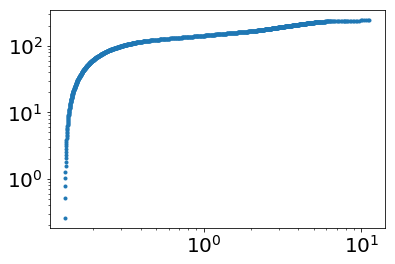

In [5]:
quantiles=np.load('momentum_quantiles.npy')
#print(quantiles)
print(quantiles.shape)
n=950
print(min(quantiles[2]))
#plt.loglog(quantiles[2,:n],1-quantiles[0,:n],'.')
plt.loglog(quantiles[2,:n],quantiles[1,:n],'.')

reading from '/Users/jgbaker/Projects/LPF/micrometeoriod/LISAPathfinder/scripts/Analysis/data/population_ratios/grid_JFC_HTC_Uniform_20190219.txt
Maximum :         logp       JFC       HTC   Uniform
357 -1709.04  0.800554  0.094183  0.105263
order0 JFC
order1 HTC
order2 Uniform
reading from '/Users/jgbaker/Projects/LPF/micrometeoriod/LISAPathfinder/scripts/Analysis/data/population_ratios/grid_JFC_HTC_Uniform_rbar2_20190219.txt
order0 JFC
order1 HTC
order2 Uniform


/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:83: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecat

Maximum :         logp       JFC       HTC   Uniform
357 -1688.36  0.800554  0.094183  0.105263
intp:
reading from '/Users/jgbaker/Projects/LPF/micrometeoriod/LISAPathfinder/scripts/Analysis/data/population_ratios/grid_JFC_HTC_Uniform_20190327.txt
order0 JFC
order1 HTC
order2 Uniform
Maximum :         logp       JFC       HTC   Uniform
357 -1709.04  0.800554  0.094183  0.105263


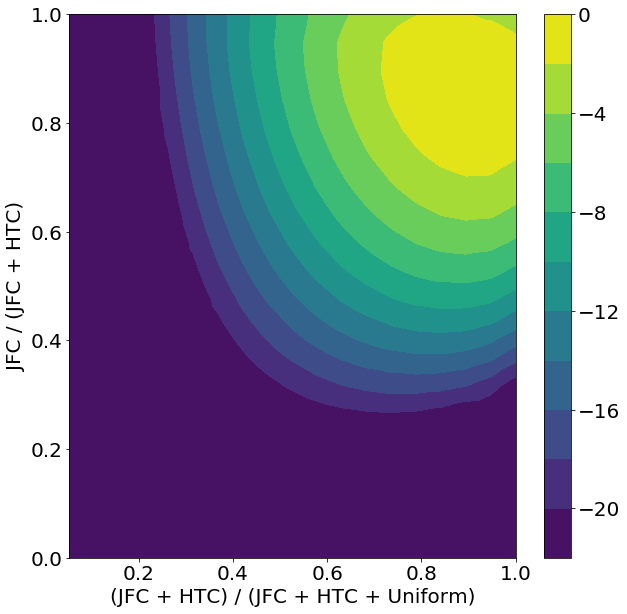

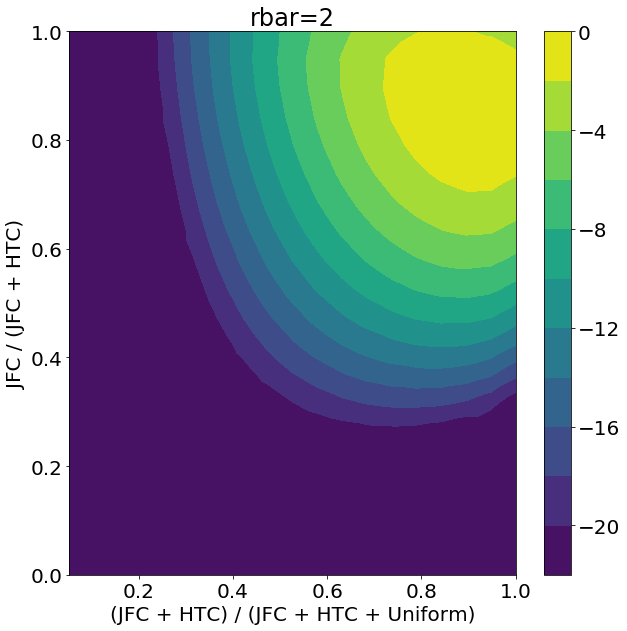

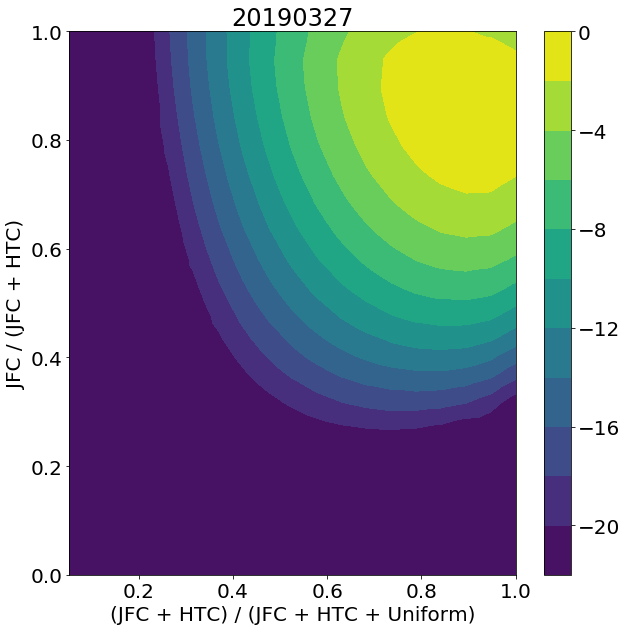

In [6]:
# JFC HTC Uniform

order = ['JFC', 'HTC', 'Uniform']
df = get_logp_grid(filename = 'grid_JFC_HTC_Uniform_20190219.txt')
print('Maximum :', df[df['logp'] == max(df['logp'])])
imshowGrid(df, order = order)
plt.savefig('grid_JFC_HTC_Uniform_20190219.pdf')

df = get_logp_grid(filename = 'grid_JFC_HTC_Uniform_rbar2_20190219.txt')
imshowGrid(df, order = order,label="rbar=2")
plt.savefig('grid_JFC_HTC_Uniform_rbar2_20190219.pdf')

#plot3d(df, order = order)
print('Maximum :', df[df['logp'] == max(df['logp'])])
print('intp:')
order = ['JFC', 'HTC', 'Uniform']
df = get_logp_grid(filename = 'grid_JFC_HTC_Uniform_20190327.txt')
#for i in range(len(order) - 1):
#    order = np.roll(order, i)
#    imshowGrid(df, order = order,label='20190327')

imshowGrid(df, order = order,label='20190327')

#plot3d(df, order = order)
print('Maximum :', df[df['logp'] == max(df['logp'])])

reading from '/Users/jgbaker/Projects/LPF/micrometeoriod/LISAPathfinder/scripts/Analysis/data/population_ratios/grid_JFC_HTC_rbar_20190219.txt
order0 r_bar
order1 JFC
order2 HTC
Maximum :          logp       JFC       HTC  r_bar
330 -1688.902  0.842105  0.157895    2.2
intp:
reading from '/Users/jgbaker/Projects/LPF/micrometeoriod/LISAPathfinder/scripts/Analysis/data/population_ratios/grid_JFC_HTC_rbar_20190327.txt
order0 r_bar
order1 JFC
order2 HTC
Maximum :          logp       JFC       HTC  r_bar
330 -1688.902  0.842105  0.157895    2.2


/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:83: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which w

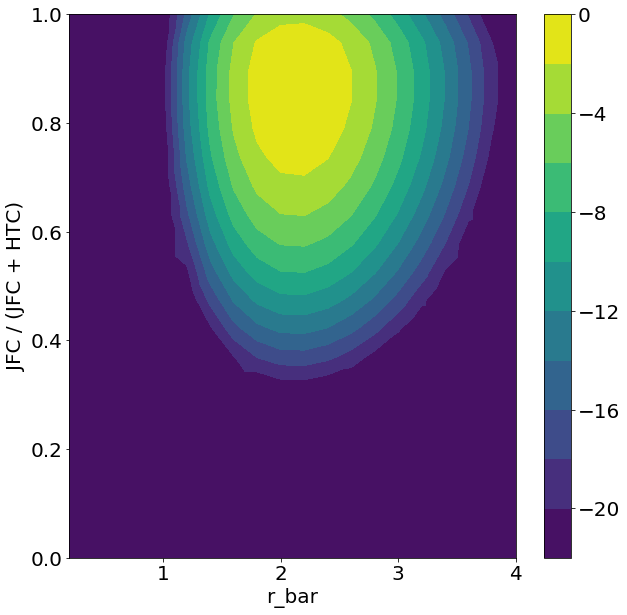

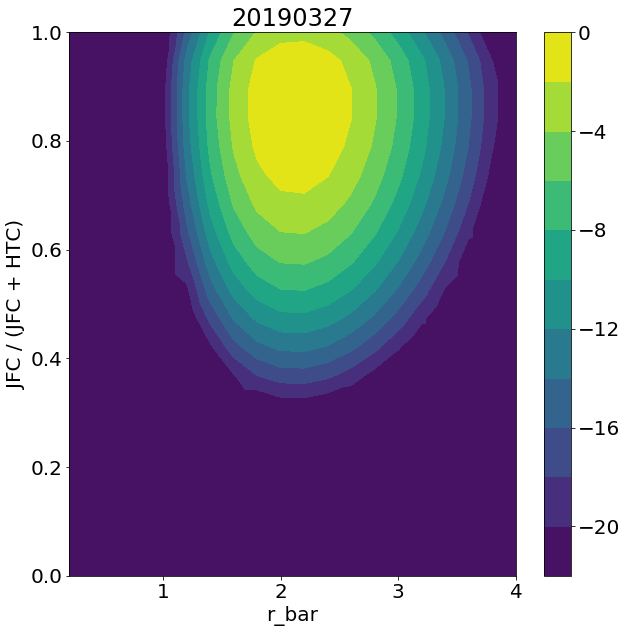

In [7]:
# JFC HTC r_bar

df = get_logp_grid(filename = 'grid_JFC_HTC_rbar_20190219.txt')
order = ['JFC', 'HTC', 'r_bar']
for i in [1]:
    order = np.roll(order, i)
    imshowGrid(df, order = order,raw_x=True)
print('Maximum :', df[df['logp'] == max(df['logp'])])
print('intp:')
df = get_logp_grid(filename = 'grid_JFC_HTC_rbar_20190327.txt')
order = ['JFC', 'HTC', 'r_bar']
for i in [1]:
    order = np.roll(order, i)
    imshowGrid(df, order = order,raw_x=True,label='20190327')
print('Maximum :', df[df['logp'] == max(df['logp'])])

lon-lat test for pop  JFC
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
int,norm,int/norm 3.866503334955212e-06 3.869067047940482e-06 0.9993373821250695


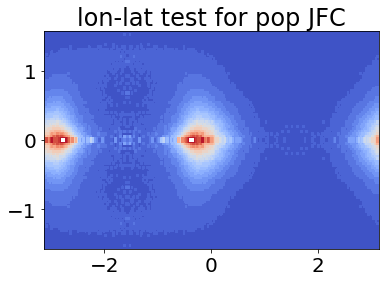

lon-lat test for pop  HTC
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
int,norm,int/norm 1.4533035382280092e-06 1.4537607832907463e-06 0.9996854743448905


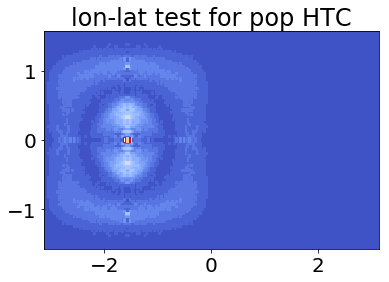

lon-lat test for pop  AST
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
int,norm,int/norm 4.307298204657979e-08 4.30828035166676e-08 0.9997720327071099


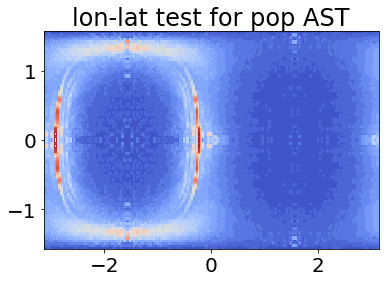

lon-lat test for pop  Uniform
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
uniform norm= 1.4814444444444444e-07
int,norm,int/norm 1.4814444444444714e-07 1.4814444444444444e-07 1.0000000000000182


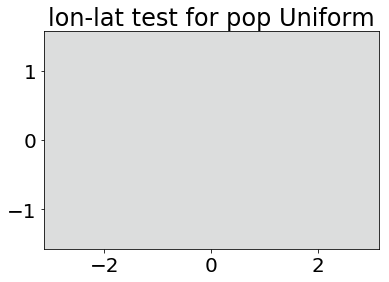

dth-dphi test for pop  JFC
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
int,norm,int/norm 3.8689540427511925e-06 3.869067047940482e-06 0.9999707926515903
dth-dphi test for pop  HTC
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
int,norm,int/norm 1.4529183829414452e-06 1.4537607832907463e-06 0.9994205371619709
dth-dphi test for pop  AST
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
int,norm,int/norm 4.3027142462655084e-08 4.30828035166676e-08 0.9987080447540749
dth-dphi test for pop  Uniform
Will interpolate on grid:
(lon,lat): (array([-179, -179, -179, ...,  179,  179,  179]), array([-89, -87, -85, ...,  85,  87,  89]))
uniform norm= 1.4814444444444444e-07
int,norm,int/norm 1.4634048719893836e-07 1.4814444444444444e-07 0.98782298416

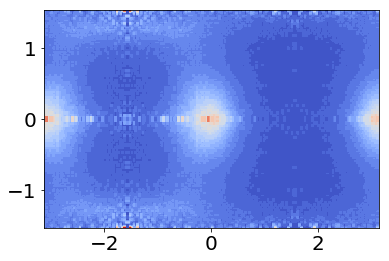

In [8]:
#Check population normalizations
from populationClass import population as pop
Ngrid=1000
poplist=['JFC','HTC','AST','Uniform']
#First we do a lat-lon grid normalization check
#First with integrated P values
gridLon=np.linspace(-np.pi*(1-1.0/Ngrid),np.pi*(1-1.0/Ngrid),Ngrid)
gridLat=gridLon/2.0
for popname in poplist:
    print('lon-lat test for pop ',popname)
    p=pop(modelPath, popname, usePtot=True)
    fluxes=[[p.getFlux(lon,lat,None, norm = False)/4.0 for lon in gridLon*180/np.pi] for lat in gridLat*180/np.pi]
    normint=sum([sum(row) for row in fluxes])/Ngrid**2*360*180
    print('int,norm,int/norm',normint,p.norm,normint/p.norm)
    x=np.array([gridLon for lat in gridLat])
    y=np.array([[lat for lon in gridLon]for lat in gridLat])
    plt.contourf(x,y,fluxes,30,cmap=mpl.cm.coolwarm)
    plt.title('lon-lat test for pop '+popname)
    plt.show()
    
#Next we do a Uniform sky integral normalization check
gridLogP=np.linspace(-1,3,10)
gridSinLat=np.linspace(-1+1.0/Ngrid,1-1.0/Ngrid,Ngrid)
for popname in poplist:
    print('dth-dphi test for pop ',popname)
    p=pop(modelPath, popname, usePtot=True)
    fluxes=[[p.getFlux(lon,lat,None, norm = False)*180**2/np.pi/np.cos(lat*np.pi/180.) for lon in gridLon*180/np.pi] for lat in np.arcsin(gridSinLat)*180/np.pi]
    normint=sum([sum(row) for row in fluxes])/Ngrid**2
    print('int,norm,int/norm',normint,p.norm,normint/p.norm)
    #x=np.array([gridLon for lat in gridLat])
    #y=np.array([[lat for lon in gridLon]for lat in gridLat])
    #plt.contourf(x,y,fluxes,30,cmap=mpl.cm.coolwarm)
    #plt.title('-lat test for pop '+popname)
    #plt.show()

p=pop(modelPath, 'JFC', usePtot=True)
norms=[
    sum([
        sum([p.getFlux(lon,np.arcsin(slat),lp, norm = False) for lon in gridLon])
        for slat in gridSinLat])
    for lp in gridLogP]/p.norm
#plt.plot(gridLogP,np.log(norms))
#note getFlux fn takes arguments in degrees
#skyf=np.array([[[p.getFlux(180.0/np.pi*lon,np.arcsin(slat)*90/np.pi,lp,norm=False)/np.sqrt(1-slat**2) for lon in gridLon]for slat in gridSinLat] for lp in gridLogP])
skyf=np.array([[[p.getFlux(180.0/np.pi*lon,np.arcsin(slat)*180/np.pi,lp,norm=False)/np.sqrt(1-slat**2) for lon in gridLon]for slat in gridSinLat] for lp in gridLogP])
#skyf=np.array([[[p.getFlux(lon,slat,lp,norm=False)for lon in gridLon]for slat in gridSinLat] for lp in gridLogP])
x=np.array([gridLon for slat in gridSinLat])
y=np.array([[np.arcsin(slat) for lon in gridLon]for slat in gridSinLat])
plt.contourf(x,y,skyf[2],30,cmap=mpl.cm.coolwarm)
plt.show()

/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """
/Users/jgbaker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


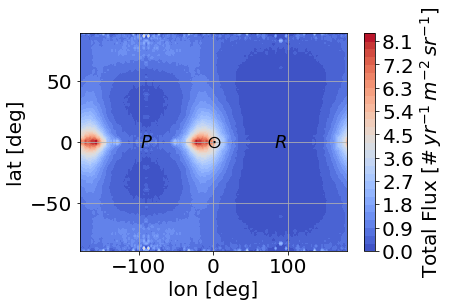

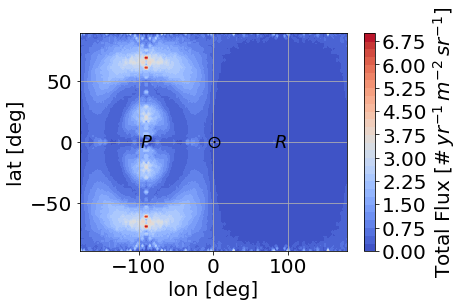

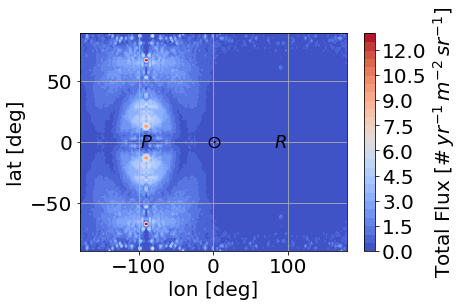

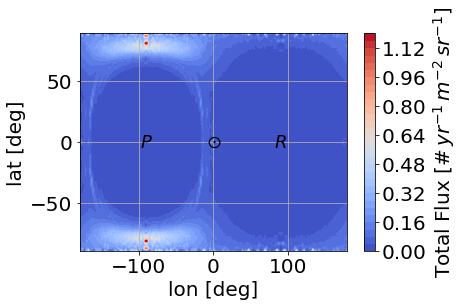

In [9]:
#Adapting from Ira
# define method to load data from files
def loadPopData(filename):
    dat = np.loadtxt(filename)
    lat = dat[[np.arange(0,90,1),1]]
    lon = dat[[np.arange(0,np.shape(dat)[0],90),0]]
    P = np.zeros((9,np.shape(lon)[0],np.shape(lat)[0]))
    Px = [1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3]
    for ii in range(0,9):
          P[ii] = np.reshape(dat[...,ii+2],[np.shape(lon)[0],np.shape(lat)[0]])
    out = {'lat' : lat, 'lon' : lon, 'P' : P, 'Px' : Px}
    return out
# read all population files
popNames = ['JFC','HTC','OCC','AST']
# make plot directory
baseDir = '../data/population_models'
#baseDir = '../data/models'
plotDir = '../plots'
pops = dict()
for ii in range(0,len(popNames)):
    pops[ii] = loadPopData(baseDir + '/' + popNames[ii] + '_impulse.dat')
    
for ii in range (0,len(pops)):
    # read in momentum sky bins
    lon = pops[ii]['lon']*np.pi/180
    lat = pops[ii]['lat']*np.pi/180
    Psky = np.transpose(pops[ii]['P'][2])
    dlat = lat[1]-lat[0]
    dlon = lon[1]-lon[0]
    dA = np.cos(lat)*dlat*dlon
    Fsky = np.zeros(np.shape(Psky))
    for jj in range(0,len(lon)):
        Fsky[...,jj] = Psky[...,jj]/dA

    
    fig = plt.figure()
    plt.contourf(lon*180/np.pi, lat*180/np.pi,3.154e7*Fsky,30, cmap=mpl.cm.coolwarm)
    plt.text(0,0,'$\odot$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    plt.text(-90,0,'$P$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    plt.text(90,0,'$R$',fontsize=18,horizontalalignment='center',verticalalignment='center')
    #plt.title(popNames[ii])
    plt.grid(True)
    plt.xlabel('lon [deg]')
    plt.ylabel('lat [deg]')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Total Flux $[\#\,yr^{-1}\,m^{-2}\,sr^{-1}]$')
    fig.savefig(plotDir + '/map_' + popNames[ii] + '.eps', format = 'eps')